In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt

In [3]:
#Reading data from CSV file
df = pd.read_csv('homeprices.csv')
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


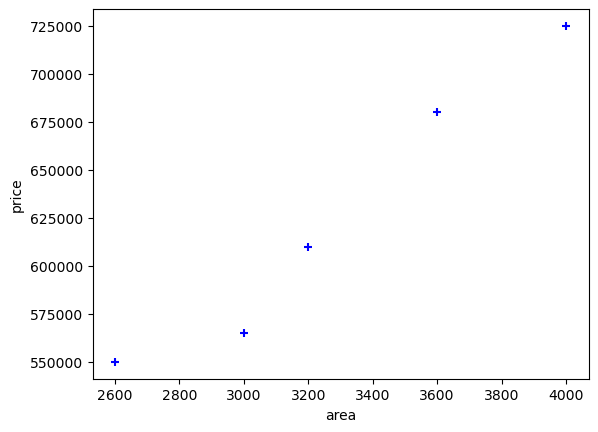

In [4]:
#plotting data points
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price,color='blue',marker='+')

In [5]:
#Seprate Area snd price from Dataframe
areas = df.drop('price',axis='columns')
areas

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [6]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [7]:
# Create linear regression Model
reg = linear_model.LinearRegression()
reg.fit(areas.values,price.values) #.values get data without headers

LinearRegression()

In [8]:
# Now prdict price of home with area 3800
reg.predict([[3800]])

array([696609.5890411])

In [9]:
# This is m in equation y = mx+b. For more details see Readme.
m = reg.coef_ 
m

array([135.78767123])

In [10]:
# This is b in equation y = mx+b. For more details see Readme.
b = reg.intercept_
b

180616.43835616432

In [11]:
#Getting price from y = mx + b Equation for 3800 Area
m*3800 + b

array([696609.5890411])

# Get Prediction on a list of areas instead of only one area

In [13]:
area_df = pd.read_csv("areas.csv")
area_df.head(3)

,area
0,1000
1,1500
2,2300


In [14]:
predicted_prices = reg.predict(area_df.values)
predicted_prices

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [15]:
# Creating new price column in DataFrame
area_df['prices']=predicted_prices
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [16]:
#Exporing CSV File
area_df.to_csv("prediction.csv")